<a href="https://colab.research.google.com/github/Ritik4259/Car-Price-Prediction-/blob/main/carPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None, sep=',')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
df.columns = headers

In [ ]:
df = df.replace("?",np.nan)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

# Missing Count

In [ ]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for col in df.columns:
    print(missing_data[col].value_counts())
    print("--------------------------")

symboling
False    204
Name: count, dtype: int64
--------------------------
normalized-losses
False    164
True      40
Name: count, dtype: int64
--------------------------
make
False    204
Name: count, dtype: int64
--------------------------
fuel-type
False    204
Name: count, dtype: int64
--------------------------
aspiration
False    204
Name: count, dtype: int64
--------------------------
num-of-doors
False    202
True       2
Name: count, dtype: int64
--------------------------
body-style
False    204
Name: count, dtype: int64
--------------------------
drive-wheels
False    204
Name: count, dtype: int64
--------------------------
engine-location
False    204
Name: count, dtype: int64
--------------------------
wheel-base
False    204
Name: count, dtype: int64
--------------------------
length
False    204
Name: count, dtype: int64
--------------------------
width
False    204
Name: count, dtype: int64
--------------------------
height
False    204
Name: count, dtype: int64
-----

### Replace missing normalised-losses,bore,stroke,horsepower,peak-rpm with its means, num-of-doors with MODE,drop missing price row

In [ ]:
mean_normalised_loss = df['normalized-losses'].astype(float).mean(axis=0)
df['normalized-losses'] = df['normalized-losses'].fillna(mean_normalised_loss)


In [ ]:
mean_bore = df['bore'].astype(float).mean(axis=0)
df['bore'] = df['bore'].fillna(mean_bore)

In [ ]:
mean_stroke = df['stroke'].astype(float).mean(axis=0)
df['stroke'] = df['stroke'].fillna(mean_stroke)

In [ ]:
mean_horsepower = df['horsepower'].astype(float).mean(axis=0)
df['horsepower']=df['horsepower'].fillna(mean_horsepower)

In [ ]:
mean_rpm = df['peak-rpm'].astype(float).mean(axis=0)
df['peak-rpm']=df['peak-rpm'].fillna(mean_rpm)

In [ ]:
maxFreqDoor = df["num-of-doors"].value_counts().idxmax()
df['num-of-doors']=df['num-of-doors'].fillna(maxFreqDoor)

In [ ]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [ ]:
df.isnull().value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,count
symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,200


In [ ]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [ ]:
df['city-L/100km'] = 235/df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [ ]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


# Binning

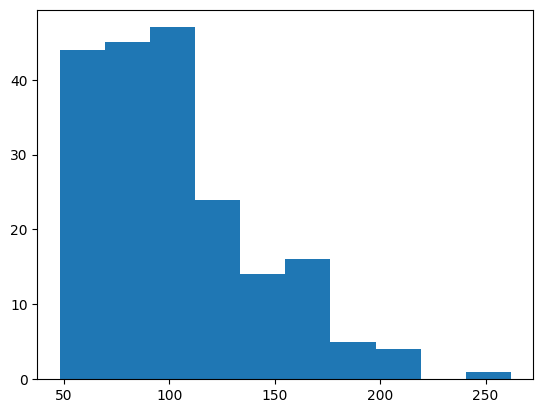

In [ ]:
df['horsepower'] = df["horsepower"].astype(int)
plt.hist(df['horsepower'])
plt.show()

In [ ]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['low','medium','high']

df['horsepower-binned'] = pd.cut(df['horsepower'],bins,labels=group_names,include_lowest=True)

df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,low
1,154,medium
2,102,low
3,115,low
4,110,low


In [ ]:
df['horsepower-binned'].value_counts()

,count
horsepower-binned,
low,152
medium,43
high,5


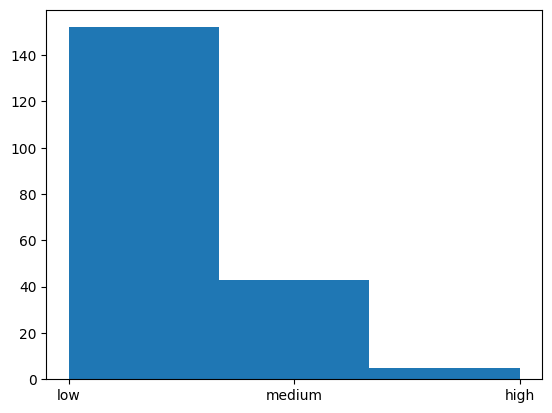

In [ ]:
plt.hist(df['horsepower-binned'],bins=3)
plt.show()

In [ ]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned
count,200.000000,200.000000,200,200,200,200,200,200,200,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
freq,NaN,NaN,32,180,164,115,94,118,197,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152
mean,0.830000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.848000,...,3.329981,3.259816,10.170100,103.365000,5118.259901,25.200000,30.705000,13205.690000,9.937914,NaN
std,1.248557,32.076542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.038261,...,0.268562,0.314177,4.014163,37.455525,479.240743,6.432487,6.827227,7966.982558,2.539415,NaN
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN
25%,0.000000,100.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,3.310000,3.290000,9.000000,95.000000,5162.995050,24.000000,30.000000,10270.000000,9.791667,NaN
75%,2.000000,138.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000,12.368421,NaN


In [ ]:
df_dummy_feul = pd.get_dummies(df['fuel-type'])
df_dummy_feul.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [ ]:
df = pd.concat([df,df_dummy_feul],axis=1)

df.drop('fuel-type',inplace=True,axis=1)

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,low,False,True
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,medium,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,low,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,low,False,True
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,25,15250.0,12.368421,low,False,True


# Plotting

In [ ]:
X = df.drop(columns='price',axis='columns')

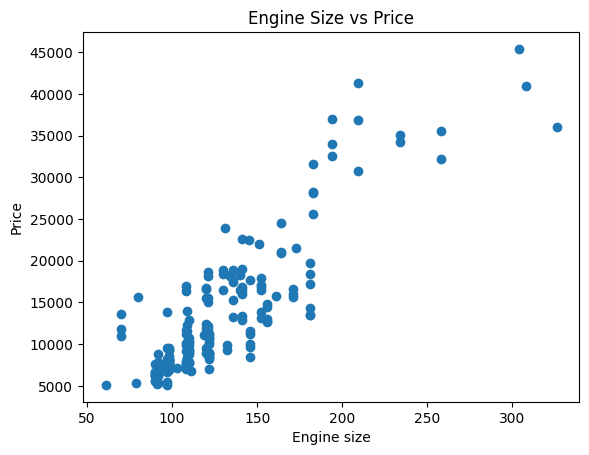

In [ ]:
plt.scatter(X['engine-size'],df['price'])
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.title("Engine Size vs Price")
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['float','int'])
numeric_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,99.8,0.851994,0.920833,0.887960,2507,136,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [ ]:
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,-0.181073,0.074617,0.284033,-0.030158,0.041248,-0.083327,0.062423
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,-0.114738,0.217322,0.239580,-0.225255,-0.182011,0.133999,0.238712
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,0.249689,0.375610,-0.365045,-0.480029,-0.552211,0.589147,0.484047
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,0.159203,0.580583,-0.286688,-0.667658,-0.700186,0.691044,0.659174
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,0.189008,0.617115,-0.247337,-0.638155,-0.684700,0.752795,0.677111
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,0.259526,-0.085829,-0.315820,-0.057087,-0.111568,0.137284,0.008923
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,0.156444,0.758076,-0.279422,-0.750390,-0.795515,0.834420,0.785868
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,0.029005,0.822689,-0.256681,-0.651002,-0.679877,0.872337,0.745337
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,0.002034,0.566807,-0.267061,-0.581272,-0.590672,0.543433,0.553954
stroke,0.008072,0.055673,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,0.186780,0.100881,-0.066021,-0.040547,-0.040170,0.083298,0.041310


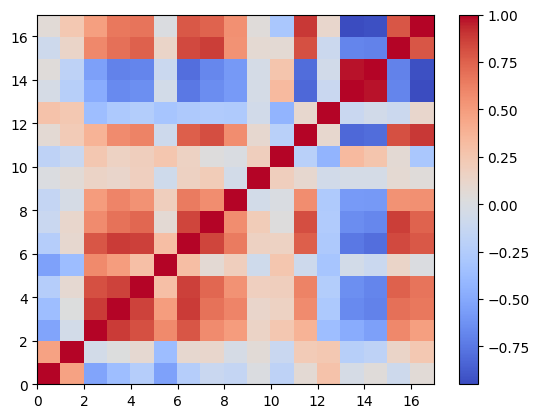

In [ ]:
plt.pcolor(numeric_df.corr(),cmap="coolwarm")
plt.colorbar()
plt.show()

<Axes: xlabel='engine-size', ylabel='price'>

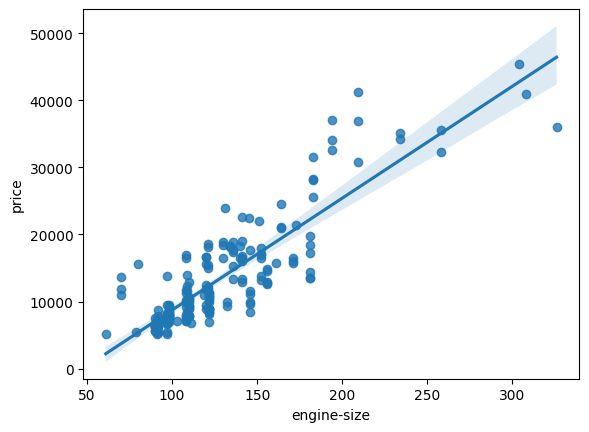

In [ ]:
sns.regplot(x='engine-size',y='price',data=df)


In [ ]:
numeric_df.nunique()

,0
symboling,6
normalized-losses,51
wheel-base,52
length,73
width,43
height,49
curb-weight,169
engine-size,43
bore,39
stroke,37


In [ ]:
cat_col = [col for col in df.columns if col not in numeric_df.columns]

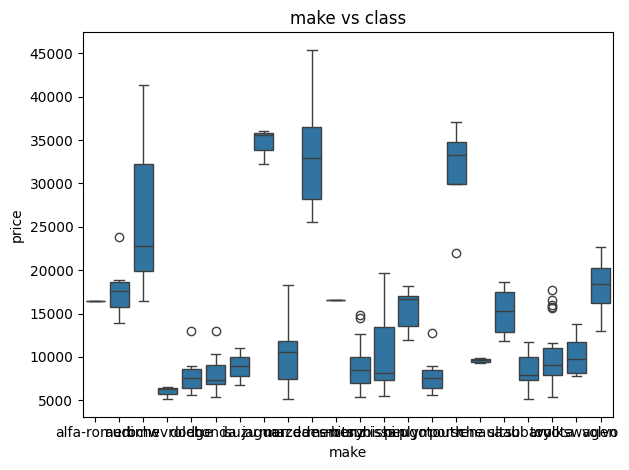

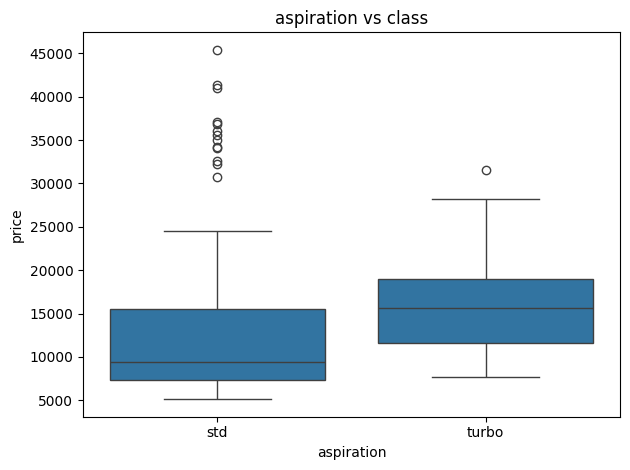

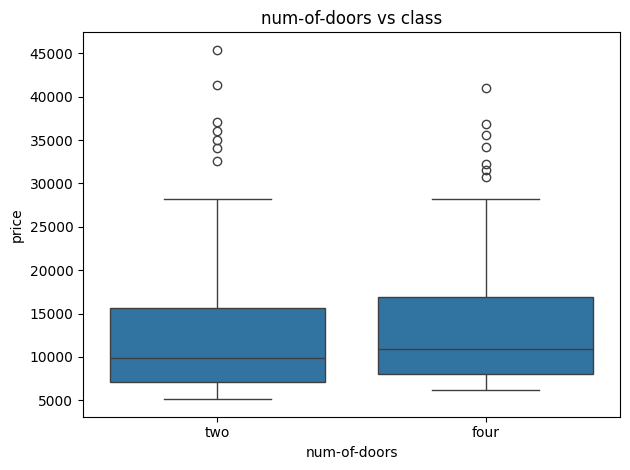

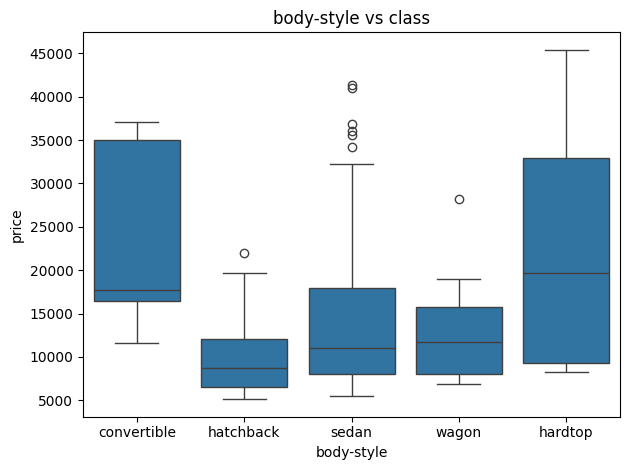

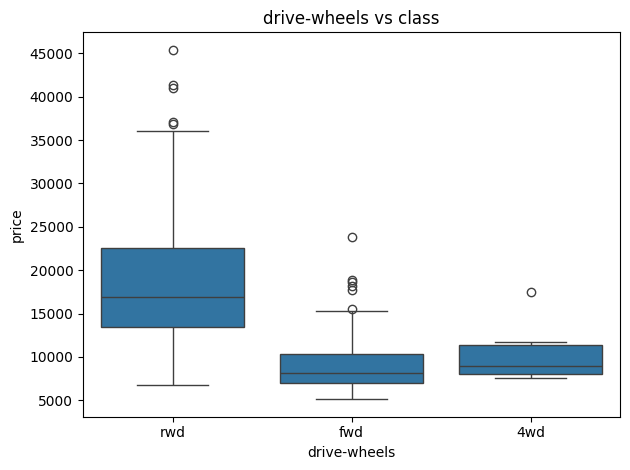

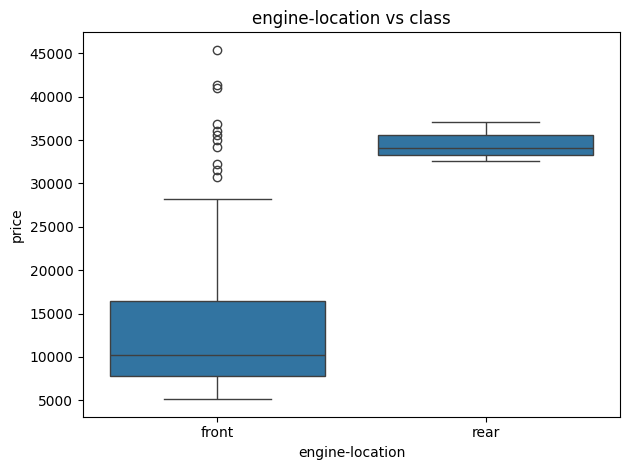

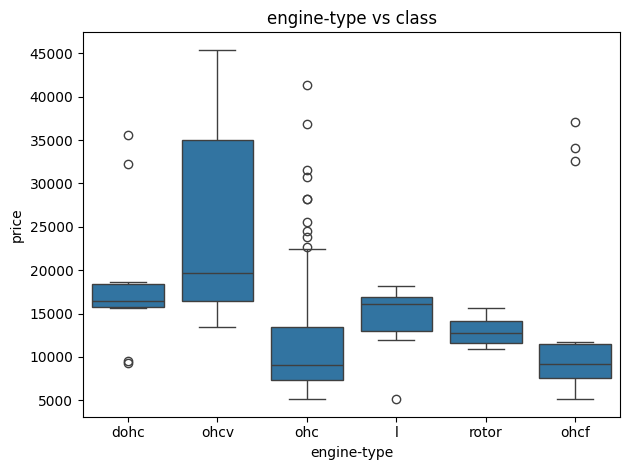

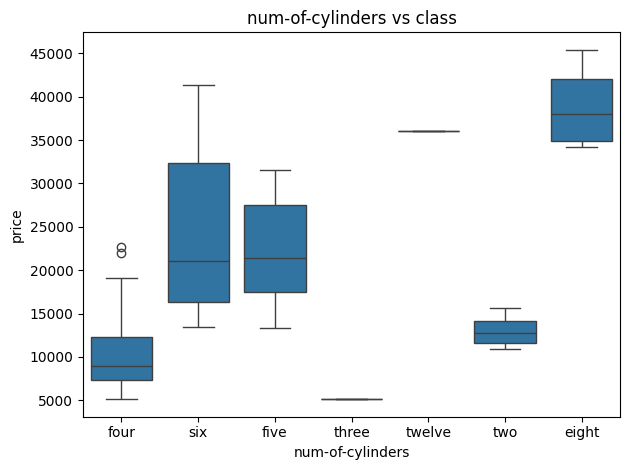

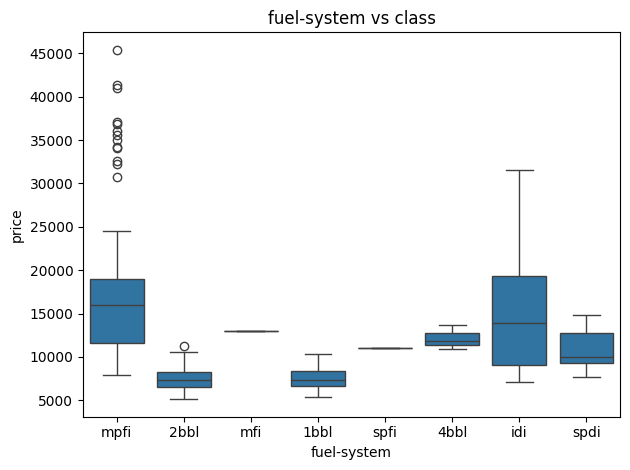

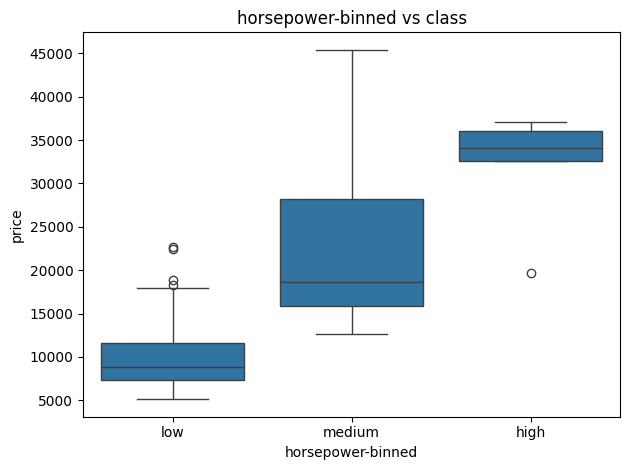

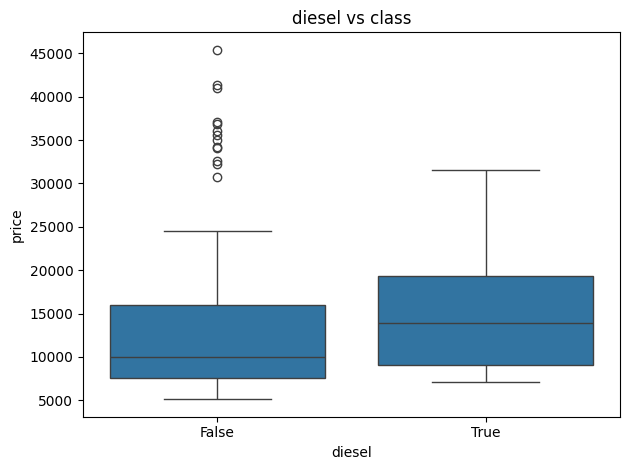

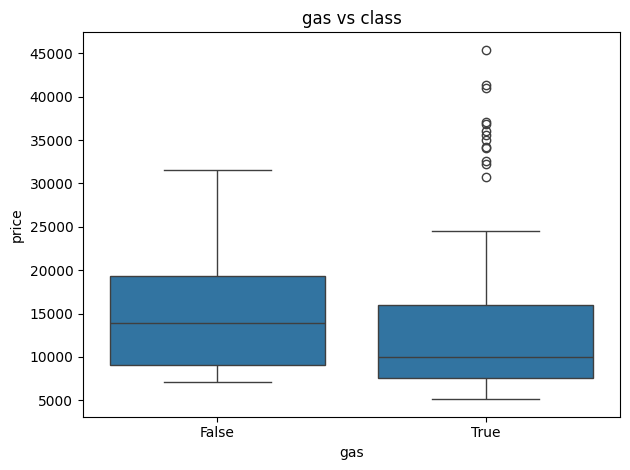

In [ ]:
for col in cat_col:
    sns.boxplot(x=col,y='price',data=df)
    plt.title(f"{col} vs class")
    plt.tight_layout()
    plt.show()

# Group By

In [ ]:
df_gp_one = df[['drive-wheels','body-style','price']]

In [ ]:
df_grouped = df_gp_one.groupby(['drive-wheels','body-style'],as_index=False).agg({'price':'mean'})
df_grouped

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [ ]:
grouped_pivot = df_grouped.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

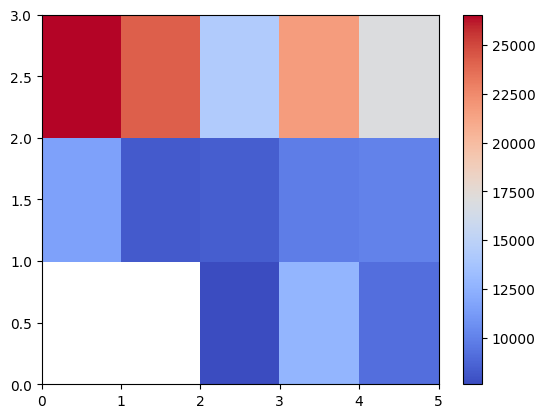

In [ ]:
plt.pcolor(grouped_pivot,cmap="coolwarm")
plt.colorbar()
plt.show()

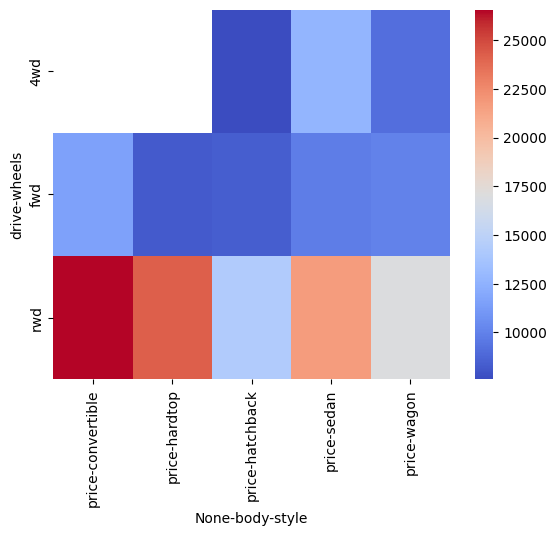

In [ ]:
sns.heatmap(grouped_pivot,cmap='coolwarm')
plt.show()

# Pearson correlation coefficient and p value

In [ ]:
from scipy import stats

In [ ]:
pearson_coef,p_value = stats.pearsonr(df['horsepower'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8096565575365614  with a P-value of P = 1.046883962592576e-47


Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

# Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score,r2_score

In [ ]:
X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.compose import ColumnTransformer
num_col = X_train.select_dtypes(include=['int','float']).columns
cat_col = X_train.select_dtypes(include=['object']).columns

transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_col),
        ('scaler', StandardScaler(), num_col)
    ]
)


In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_train_pred = lr.predict(X_train_transformed)
y_test_pred = lr.predict(X_test_transformed)


In [ ]:
r2_score(y_train,y_train_pred)

0.973945683892165

In [ ]:
r2_score(y_test,y_test_pred)

0.837116688150115

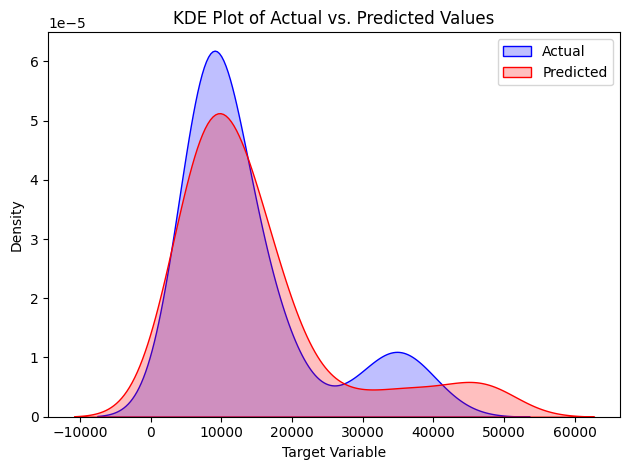

In [ ]:
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_test_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: ylabel='price'>

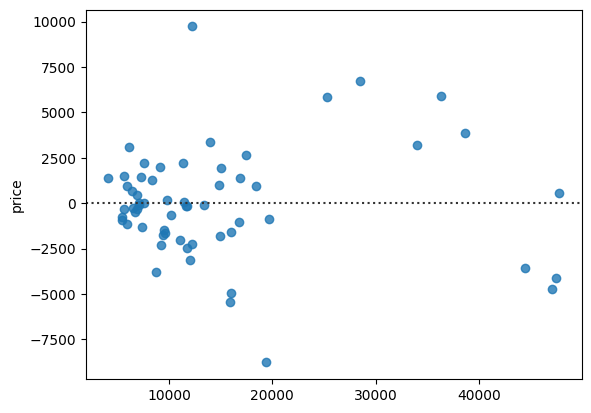

In [ ]:
sns.residplot(x=y_test_pred, y=y_test)

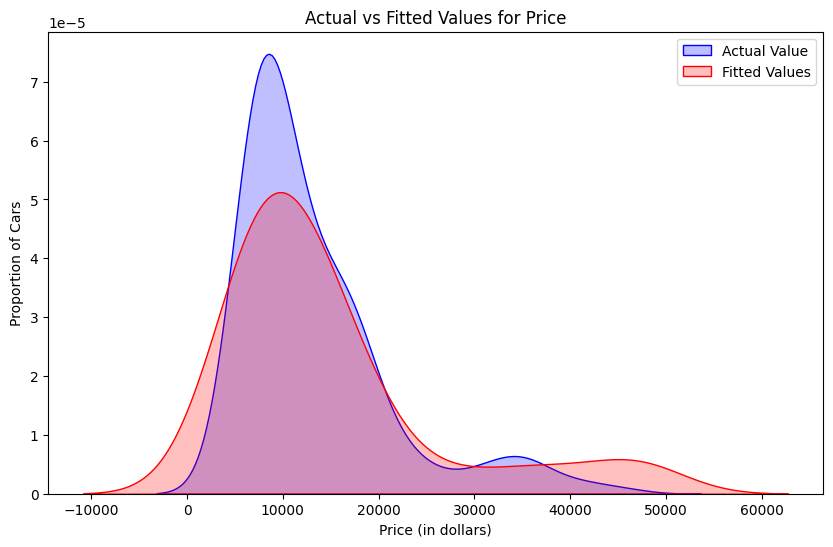

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], label='Actual Value', fill=True, color='b')
sns.kdeplot(y_test_pred, label='Fitted Values', fill=True, color='r')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=20)

X_train_sel = selector.fit_transform(X_train_transformed, y_train)
X_test_sel = selector.transform(X_test_transformed)


In [ ]:
lr.fit(X_train_sel, y_train)

y_test_pred = lr.predict(X_test_sel)
print(r2_score(y_test, y_test_pred))


0.8721274165264985


In [ ]:
y_train_pred = lr.predict(X_train_sel)
print(r2_score(y_train,y_train_pred))

0.8899554155564592


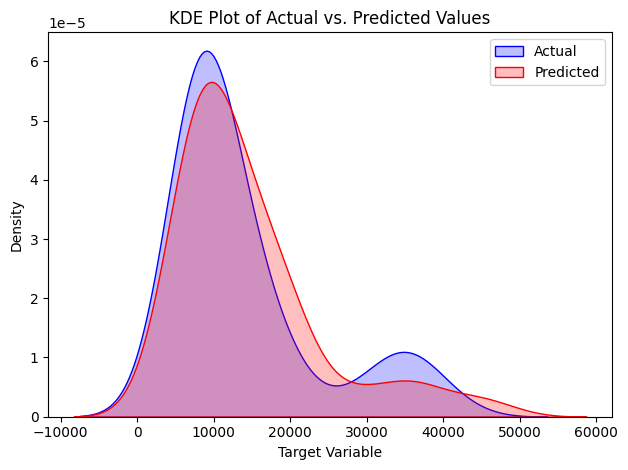

In [ ]:
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_test_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.01, 0.1,0.5,0.7, 1, 10, 100])
ridge_cv.fit(X_train_transformed, y_train)

print("Best alpha:", ridge_cv.alpha_)
print("Test R2:", ridge_cv.score(X_test_transformed, y_test))


Best alpha: 1.0
Test R2: 0.9333334276905172


In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.001,0.01,0.1,0.2,0.5,0.7,0.8,1], cv=5, max_iter=10000)
lasso_cv.fit(X_train_transformed, y_train)

print("Best alpha:", lasso_cv.alpha_)
print("Test R2:", lasso_cv.score(X_test_transformed, y_test))

Best alpha: 1.0
Test R2: 0.8750628724201558


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_test_pred)
print(mse)

11579816.956327055


In [ ]:
y_test_pred = ridge_cv.predict(X_test_transformed)

In [ ]:
y_train_pred = ridge_cv.predict(X_train_transformed)

In [ ]:
r2_score(y_train_pred,y_train)

0.9465909870201619

In [ ]:
coef_df = pd.Series(ridge_cv.coef_)
coef_df.sort_values().head()


,0
32,-3084.622403
34,-2095.636847
10,-2042.624188
23,-1903.409546
13,-1885.815609


<Axes: ylabel='price'>

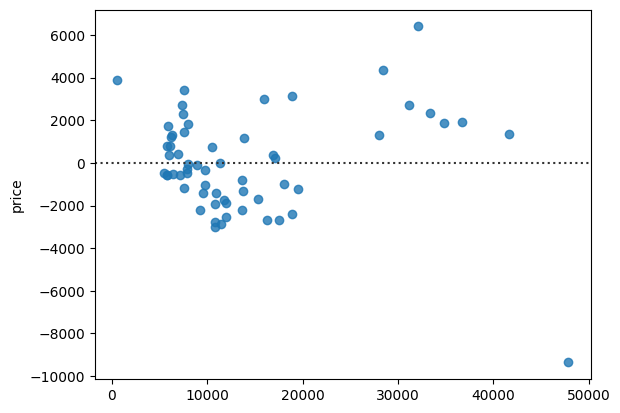

In [ ]:
sns.residplot(x=y_test_pred, y=y_test)

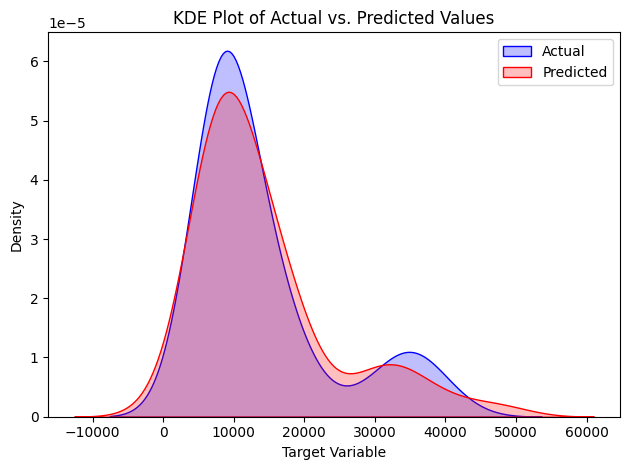

In [ ]:
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_test_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

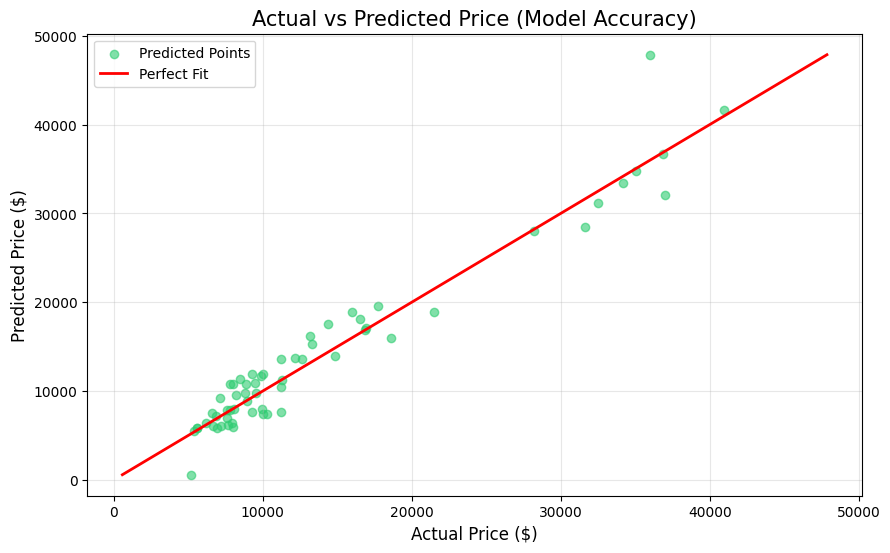

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='#2ecc71', alpha=0.6, label='Predicted Points')

max_val = max(y_test.max(), y_test_pred.max())
min_val = min(y_test.min(), y_test_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', lw=2, label='Perfect Fit')

plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title('Actual vs Predicted Price (Model Accuracy)', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

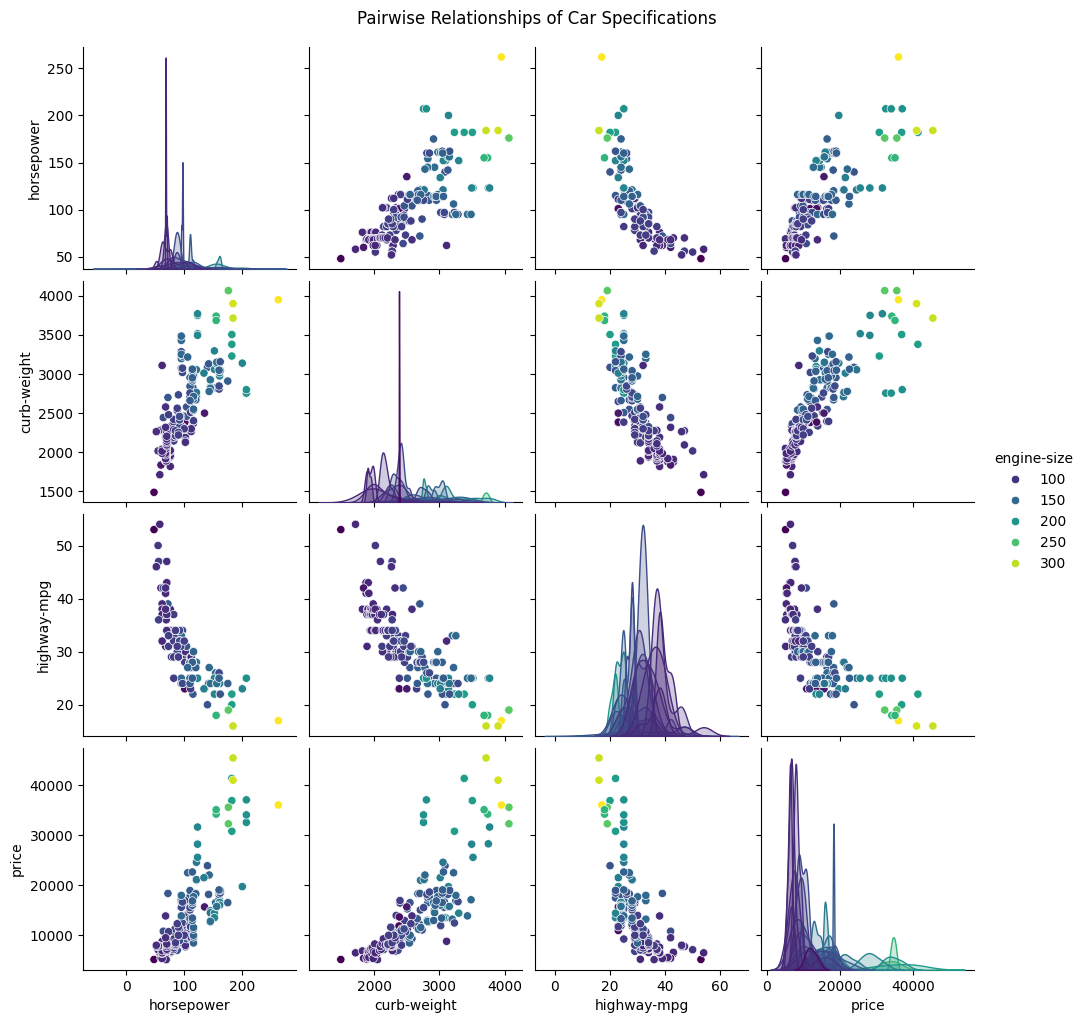

In [ ]:
cols_to_plot = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'price']

# Creating the pairplot
# 'hue' helps visualize how categories (like gas vs diesel) differ across these relationships
sns.pairplot(df[cols_to_plot], hue='engine-size', palette='viridis', diag_kind='kde')

plt.suptitle("Pairwise Relationships of Car Specifications", y=1.02)
plt.show()